Chriss Jordan Oboa

---


Professor Li

---


CS427

---


April 16th, 2023

# **Project 2**

*First step is to import Python Modules*

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import scipy.stats as stats
import statistics
from fastai.imports import * # requires fastai library installation. please pip install fastai library or comment.
# from fastai.structured import * -- not required
#from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

!pip install pandas-summary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
import platform
print("Python version:", platform.python_version())

Python version: 3.9.16


In [87]:
! pip install fastai -- to install the fastai library
! xcode-select --install -- to overcome clang dependencies on mac os.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: xcode-select: command not found


In [88]:
import pyarrow as pa
import pyarrow.parquet as pq

In [89]:
import datetime

# **Question 1**

## **a) Programmatically Download and load into your favorite analytical tool the trip data for September 2017**



In [90]:
file_path = '/content/sample_data/green_tripdata_2017-09.parquet' # local file path

In [91]:
df_raw = pq.read_table(file_path).to_pandas() # read data into a pandas dataframe

In [92]:
def display_data(df):
    with pd.option_context("display.max_rows", 20, "display.max_columns", 22): 
        display(df)
# This function will help us display our data. Max_rows and Max_columns can be altered as required.

In [93]:
display_data(df_raw.tail()) # display last 5 rows of our data.

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
882459,2,2017-09-30 23:42:33,2017-09-30 23:45:24,N,1,41,42,1,0.88,5.00,0.5,0.5,0.00,0.0,None,0.3,6.30,2,1,None
882460,2,2017-09-30 23:48:34,2017-09-30 23:55:25,N,1,42,152,1,0.98,6.50,0.5,0.5,0.00,0.0,None,0.3,7.80,2,1,None
882461,2,2017-09-30 23:59:25,2017-10-01 00:12:47,N,1,166,142,1,2.95,13.00,0.5,0.5,2.86,0.0,None,0.3,17.16,1,1,None
882462,2,2017-09-30 23:03:49,2017-09-30 23:20:03,N,1,196,129,1,2.62,12.50,0.5,0.5,0.20,0.0,None,0.3,14.00,1,1,None
882463,2,2017-09-30 23:47:14,2017-09-30 23:47:19,N,5,132,132,1,0.00,55.76,0.0,0.0,11.15,0.0,None,0.0,66.91,1,2,None


In [94]:
df_raw.columns # data columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [95]:
df_raw.info() # data info. ex: datatypes, size etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882464 entries, 0 to 882463
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               882464 non-null  int64         
 1   lpep_pickup_datetime   882464 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  882464 non-null  datetime64[ns]
 3   store_and_fwd_flag     882464 non-null  object        
 4   RatecodeID             882464 non-null  int64         
 5   PULocationID           882464 non-null  int64         
 6   DOLocationID           882464 non-null  int64         
 7   passenger_count        882464 non-null  int64         
 8   trip_distance          882464 non-null  float64       
 9   fare_amount            882464 non-null  float64       
 10  extra                  882464 non-null  float64       
 11  mta_tax                882464 non-null  float64       
 12  tip_amount             882464 non-null  floa

## **b) Report how many rows and columns of data you have loaded**


In [96]:
row_count = df_raw.shape[0] # 0 for row
column_count = df_raw.shape[1] # 1 for column

In [97]:
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Number of rows: 882464
Number of columns: 20


There are 882464 rows and 20 columns.

# **Question 2**

## **a) Plot a histogram of the number of the trip distance ("Trip Distance").**

In [98]:
display_data(df_raw.trip_distance.head()) # use the display_data helper function to view the 5 first rows

0    0.00
1    1.74
2    0.93
3    5.85
4    1.15
Name: trip_distance, dtype: float64

In [19]:
minimum_trip_distance = df_raw['trip_distance'].min() # minimum trip distance
maximum_trip_distance = df_raw['trip_distance'].max() # maximum trip distance

In [99]:
print("Minimum trip distance:", minimum_trip_distance, "miles")
print("Maximum trip distance:", maximum_trip_distance, "miles")

Minimum trip distance: 0.0 miles
Maximum trip distance: 107.7 miles


In [100]:
trip_distance_value_count = df_raw['trip_distance'].value_counts() # trip distance value count
trip_distance_value_count.head()

1.0    10108
0.9    10029
0.8     9842
0.0     9439
1.1     9365
Name: trip_distance, dtype: int64

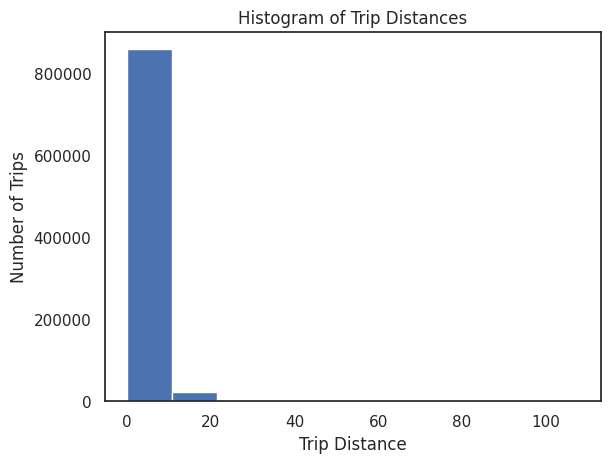

In [101]:
# This is Histogram A
# bin_edges = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30] -- not required to bin the data here
_ = plt.hist(df_raw['trip_distance'])
_ = plt.title('Histogram of Trip Distances')
_ = plt.xlabel('Trip Distance')
_ = plt.ylabel('Number of Trips')
plt.show()

**Filtered Histogram below:**

*Filtered on rides with a trip distance ("trip_Distance") less than 25 miles due to higher frequency, Histogram B presents data that has been divided into 25 evenly spaced intervals or bins. In this process, original data values falling within each bin are replaced by a representative value, usually the central value of that interval.*






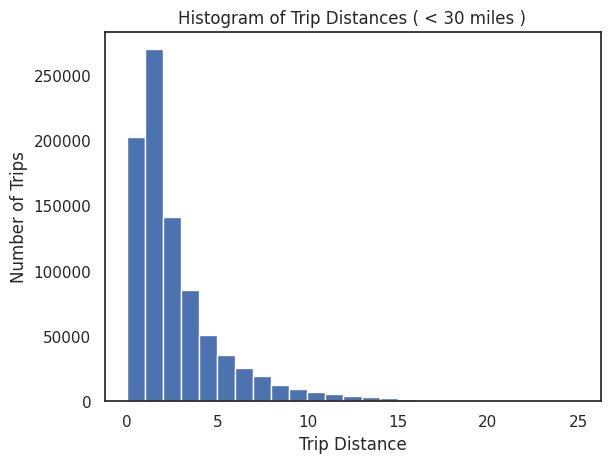

In [102]:
# This is te filtered Histogram
_ = plt.hist(df_raw['trip_distance'][df_raw['trip_distance']<25],bins = 25)
_ = plt.title('Histogram of Trip Distances ( < 30 miles )')
_ = plt.xlabel('Trip Distance')
_ = plt.ylabel('Number of Trips')
plt.show()

## **b) Report any structure you find and any hypotheses you have about that structure**

Before filtering, the Histogram looks more like a tall bar and show less data, but we could conclude that the graph suggests there are fewer trips with longer trip distances, while the majority of trips are clustered towards shorter distances. 

After filtering, the Histogram looks more right-skewed, also known as a positively skewed histogram, typically shows a long tail extending towards higher values on the right-hand side of the graph. As for the unfiltered Histogram, this suggests that there are fewer trips with longer trip distances, while the majority of trips are clustered towards shorter distances. 
Most of the trips were within the  range of 0 to 5 miles. A few trips were within the range of 5 to 10 miles, and a few trips in the dataset had trip distances greater than 10 miles.

# **Question 3**

## **a) Report mean and median trip distance grouped by hour of day.**

In [103]:
# we're stripping the hour field from the pickup_datetime field to create a new field named "pickup_hour"
df_raw['pickup'] = pd.to_datetime(df_raw['lpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df_raw['pickup_hour'] = df_raw['pickup'].apply(lambda x: x.hour) # this is a new field for holding the pickup_hour.

In [104]:
# we're stripping the hour field from the dropoff_datetime field to create a new field named "dropoff_hour"
df_raw['dropoff'] = pd.to_datetime(df_raw['lpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df_raw['dropoff_hour'] = df_raw['dropoff'].apply(lambda x: x.hour)# this is a new field for holding the dropoff_hour.

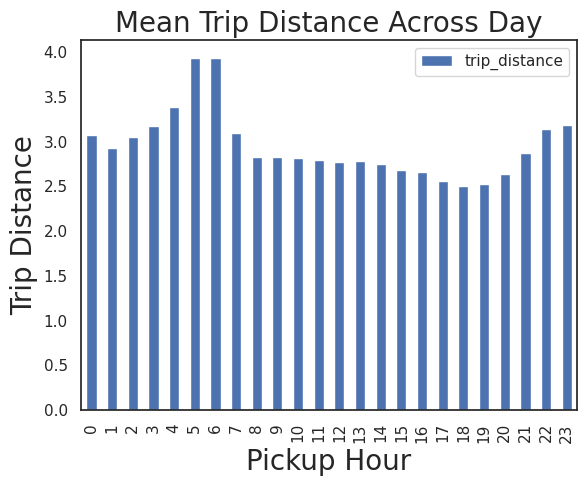

In [105]:
_ = df_raw[['trip_distance','pickup_hour']].groupby('pickup_hour').mean().plot.bar()
_ = plt.title('Mean Trip Distance Across Day', fontsize = 20)
_ = plt.xlabel('Pickup Hour', fontsize = 20)
_ = plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

Based on this graph, we can conclude that the average trip distance covered by the "Green" cabs is relatively higher during the early hours as for 4AM to 7 AM. The more, the average trip distance covered by the "Green" cabs is relatively lower around 4PM to 8 PM.

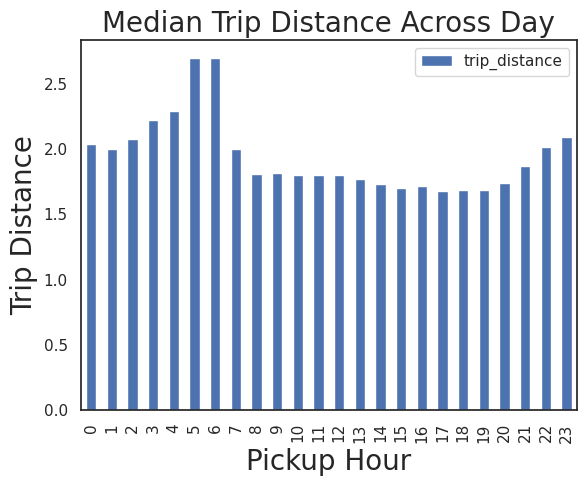

In [106]:
_= df_raw[['trip_distance','pickup_hour']].groupby('pickup_hour').median().plot.bar()
_ = plt.title('Median Trip Distance Across Day', fontsize = 20)
_ = plt.xlabel('Pickup Hour', fontsize = 20)
_ = plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

Based on this graph, we can conclude that the median trip distance covered by the "Green" cabs is relatively higher between 3AM to 6 AM. In addition, the median trip distance covered by the "Green" cabs is relatively lower around 3PM to 7 PM.

In [107]:
df_raw['lpep_pickup_datetime'] = pd.to_datetime(df_raw.lpep_pickup_datetime) # convert pickup_datetime to datetime object
df_raw.loc[:, 'day_of_week'] = df_raw['lpep_pickup_datetime'].dt.dayofweek # extract the day of week fro

**Going deeper using Line-plots**

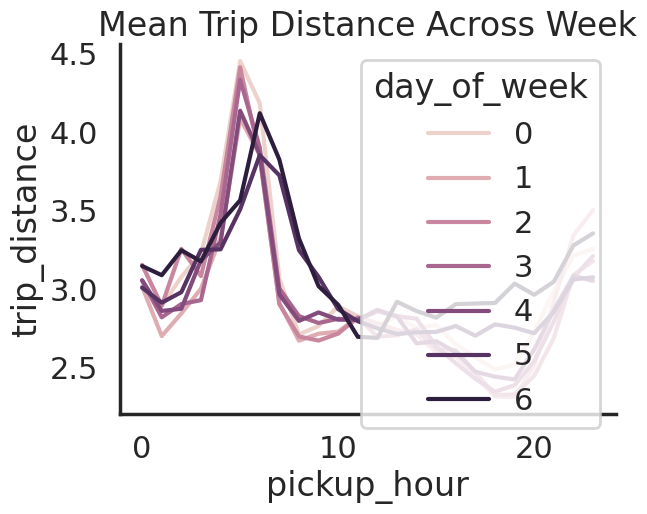

In [108]:
# code block for mean trip distance

# Groupby day of week and pickup hour, calculate mean trip distance
summary_wdays_avg_duration = pd.DataFrame(df_raw.groupby(['day_of_week','pickup_hour'])['trip_distance'].mean()) 

# Reset index to convert group labels to columns
summary_wdays_avg_duration.reset_index(inplace = True)

# Set seaborn style and context
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")

# Create time series plot with lineplot
sns.lineplot(data=summary_wdays_avg_duration, x="pickup_hour", y="trip_distance", hue="day_of_week")

# Remove spines from the plot
sns.despine(bottom = False)

# Add title to the plot
_ = plt.title('Mean Trip Distance Across Week')

# Show the plot
plt.show()


Compared to the other week days, the graph shows that day 5 and 6, which are Saturday and Sunday, have a lowest average trip distance covered by the "Green" cabs between 4AM to 7 AM. However, the graph also shows that day 5 and 6, have a highest average trip distance covered by the "Green" cabs between 4PM to 8 PM.

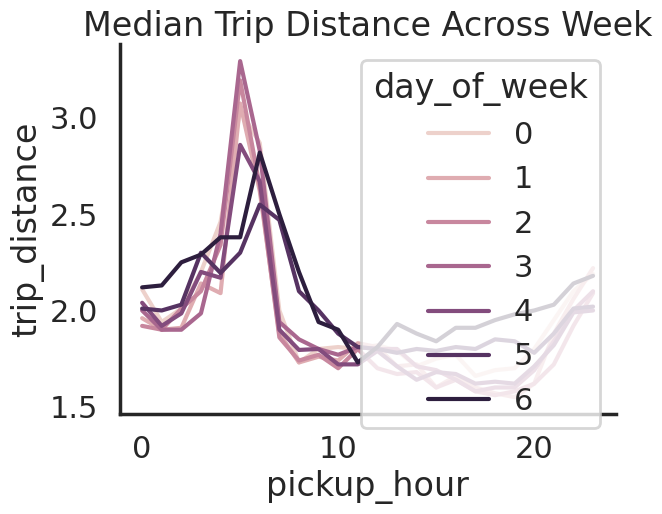

In [109]:
# Groupby day of week and pickup hour, calculate median trip distance
summary_wdays_avg_duration = pd.DataFrame(df_raw.groupby(['day_of_week','pickup_hour'])['trip_distance'].median())

# Reset index to convert group labels to columns
summary_wdays_avg_duration.reset_index(inplace = True)

# Set seaborn style and context
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")

# Create time series plot with lineplot
sns.lineplot(data=summary_wdays_avg_duration, x="pickup_hour", y="trip_distance", hue="day_of_week")

# Remove spines from the plot
sns.despine(bottom = False)

# Add title to the plot
_ = plt.title('Median Trip Distance Across Week')

# Show the plot
plt.show()

Compared to the other week days, the graph shows that day 5 and 6, which are Saturday and Sunday, have a lowest median trip distance covered by the "Green" cabs between 4AM to 7 AM. However, the graph also shows that day 5 and 6, have a highest median trip distance covered by the "Green" cabs between 4PM to 8 PM.

## **b) We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.**

In [110]:
def which_nyairport(row):
    if (
        (row['PULocationID'] == 132) or  # PULocationID 132 corresponds to JFK airport
        (row['DOLocationID'] == 132)     # DOLocationID 132 corresponds to JFK airport
    ):
        return 'JFK'  # John F. Kennedy International Airport
    
    if (
        (row['PULocationID'] == 138) or  # PULocationID 138 corresponds to LAG airport
        (row['DOLocationID'] == 138)     # DOLocationID 138 corresponds to LAG airport
    ):
        return 'LAG'  # LaGuardia Airport
    
    return 'NOT'  # Not an Airport pickup/dropoff

In [111]:
df_raw['Airport'] = df_raw.apply(which_nyairport, axis=1) 
# this is to create a new field in the dataframe based on the helper function written above.

In [112]:
df_raw['Airport'].value_counts() # what's the distribution of the rides

NOT    865545
LAG     10981
JFK      5938
Name: Airport, dtype: int64

In [113]:
print('average fair for airport trips',df_raw[df_raw['Airport']!= 'NOT']['fare_amount'].mean()) #average fare
print('number of trips satisfying the criteria:',df_raw[df_raw['Airport']!='NOT']['fare_amount'].shape[0])


average fair for airport trips 27.013637330811513
number of trips satisfying the criteria: 16919


In [114]:
print('average fair for non-airport trips',df_raw[df_raw['Airport']=='NOT']['fare_amount'].mean()) #average fare


average fair for non-airport trips 12.04185989174451


In [115]:
df_raw_airports = df_raw[df_raw['Airport']!= 'NOT'] # display the non-aiport data.
display_data(df_raw_airports.head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup,pickup_hour,dropoff,dropoff_hour,day_of_week,Airport
96,2,2017-09-01 01:00:06,2017-09-02 00:18:33,N,5,138,161,2,9.48,50.0,0.0,...,0.0,50.00,2,2,None,2017-09-01 01:00:06,1,2017-09-02 00:18:33,0,4,LAG
258,2,2017-09-01 00:30:06,2017-09-01 01:05:21,N,1,40,132,1,13.84,40.5,0.5,...,0.3,46.80,1,1,None,2017-09-01 00:30:06,0,2017-09-01 01:05:21,1,4,JFK
360,2,2017-09-01 00:55:36,2017-09-01 01:01:04,N,1,93,138,3,2.70,9.5,0.5,...,0.3,12.96,1,1,None,2017-09-01 00:55:36,0,2017-09-01 01:01:04,1,4,LAG
497,2,2017-09-01 00:47:30,2017-09-01 01:10:10,N,5,138,265,1,12.84,70.0,0.0,...,0.0,84.00,1,2,None,2017-09-01 00:47:30,0,2017-09-01 01:10:10,1,4,LAG
1837,2,2017-09-01 03:01:52,2017-09-01 03:11:28,N,1,129,138,2,3.47,12.5,0.5,...,0.3,13.80,1,1,None,2017-09-01 03:01:52,3,2017-09-01 03:11:28,3,4,LAG


**Points-Plots**

*   Simple point plots can explain how the average fare is changing with different days of week at JFK and LAG







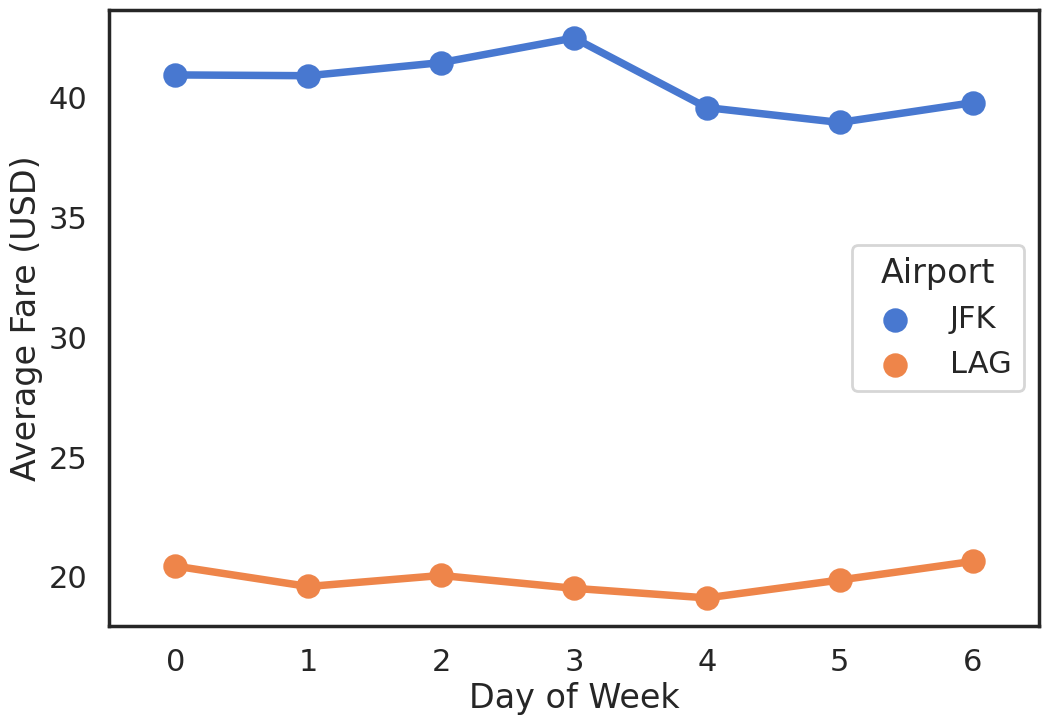

In [116]:
grouped_df = df_raw_airports.groupby(['day_of_week', 'Airport'])['fare_amount'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.pointplot(x=grouped_df.day_of_week, y=grouped_df.fare_amount, hue=grouped_df.Airport)
plt.ylabel('Average Fare (USD)')
plt.xlabel('Day of Week')
plt.xticks(rotation='horizontal')
plt.show()


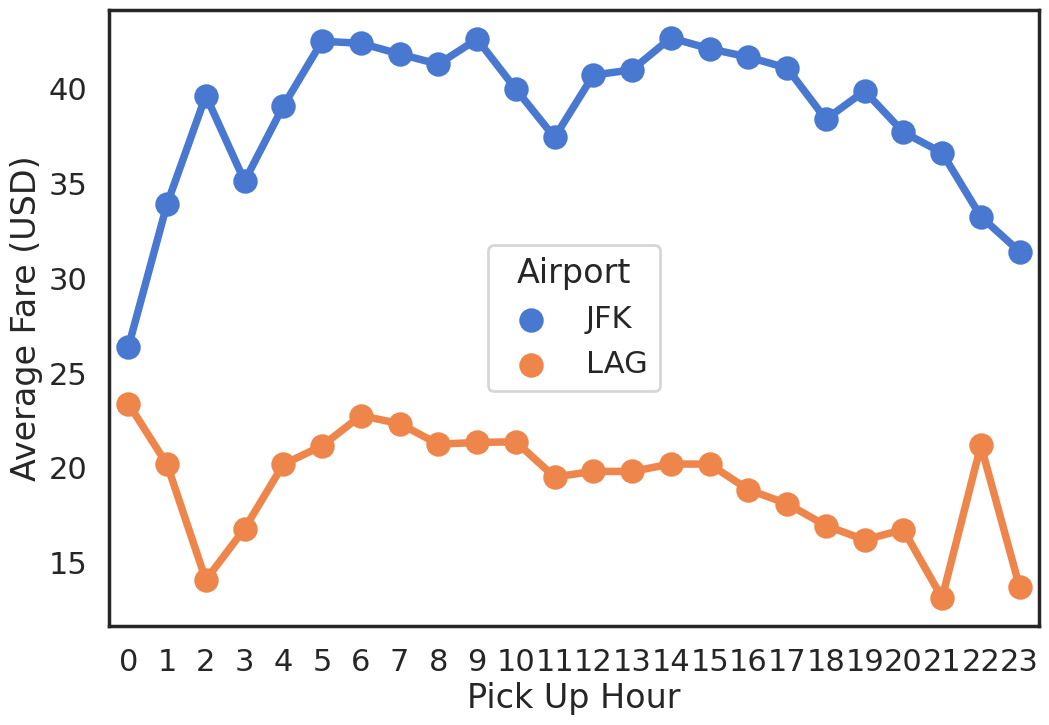

In [117]:
grouped_df = df_raw_airports.groupby(['pickup_hour', 'Airport'])['fare_amount'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.pointplot(x=grouped_df.pickup_hour, y=grouped_df.fare_amount, hue=grouped_df.Airport)
plt.ylabel('Average Fare (USD)')
plt.xlabel('Pick Up Hour')
plt.xticks(rotation='horizontal')
plt.show()


**Findings**

The data depicted in the point plots above clearly indicate that trips to/from JFK exhibit an average fare that is nearly twice as high as that of LAG. Additionally, it is notable that on Mondays (day 0) and Sundays (day 6), the average fare is higher compared to the weekdays. Interestingly, the average fare appears to peak in the afternoon, only to sharply decline by a significant margin later in the day.



**Vendor-level analysis on Airport data**

In [118]:
temp = df_raw_airports.copy()
df_raw_airports['pickup_datetime'] = pd.to_datetime(df_raw_airports.lpep_pickup_datetime)
df_raw_airports.loc[:, 'pickup_date'] = df_raw_airports['pickup_datetime'].dt.date

# get the average fare for vendor 1
ts_v1 = pd.DataFrame(df_raw_airports.loc[df_raw_airports['VendorID']==1].groupby('pickup_date')['fare_amount'].mean())
ts_v1.reset_index(inplace = True)
# get the average fare for vendor 2
ts_v2 = pd.DataFrame(df_raw_airports.loc[df_raw_airports.VendorID==2].groupby('pickup_date')['fare_amount'].mean())
ts_v2.reset_index(inplace = True)

from bokeh.palettes import Spectral4 # import spectral plot module
from bokeh.plotting import figure, output_notebook, show
output_notebook()
p = figure(plot_width=950, plot_height=550, x_axis_type="datetime", tools="zoom_in, zoom_out")
p.toolbar.active_scroll = "auto"
p.title.text = ''

for data, name, color in zip([ts_v1, ts_v2], ["vendor 1", "vendor 2"], Spectral4): # iterate over the vendor data
    df = data
    p.line(df['pickup_date'], df['fare_amount'], line_width=2, color=color, alpha=0.8, legend=name)

p.legend.location = "top_left"
p.xaxis.axis_label = "Pickup Date"
p.yaxis.axis_label = "Average Fare (USD)"
show(p)
df_raw_airports = temp

import warnings
warnings.filterwarnings("ignore") 

Findings

It's interesting to observe that Vendor 1 had a significantly higher average fare in the month of September. This disparity could possibly be explained by the fact that Vendor 1 tends to provide more rides compared to Vendor 2, or it could be due to Vendor 1 implementing dynamic or higher pricing strategies. However, it's worth noting that Vendor 2 managed to surpass Vendor 1 in terms of average fares on September 7th, September 9th, and September 18th.

# **Question 4**

## **a) Build a derived variable for tip as a percentage of the total fare.**

In [119]:
df_raw.columns # column info

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup', 'pickup_hour', 'dropoff', 'dropoff_hour', 'day_of_week',
       'Airport'],
      dtype='object')

In [120]:
df_raw['tip_percent'] = df_raw['tip_amount']/df_raw['total_amount'] # calculate tip percentage 
df_raw['tip_percent'] = df_raw['tip_percent'].apply(lambda x: x * 100) # multiply by 100 to get the %

**Analysis on the tip data**

---


Below is the analysis on average tip across day.

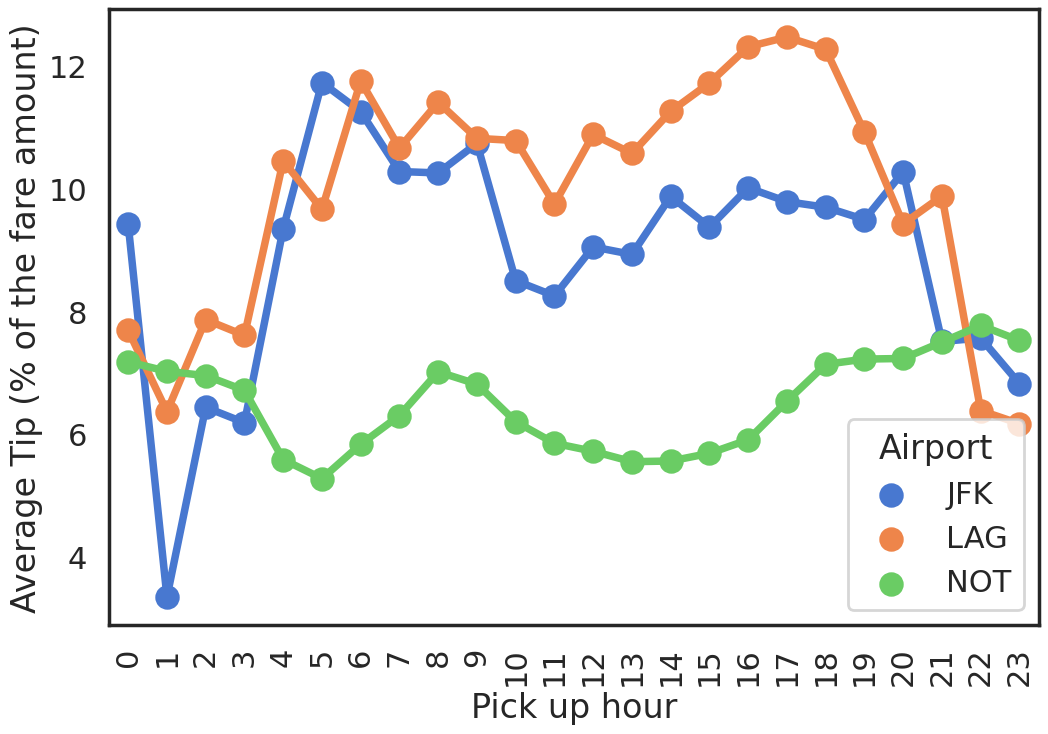

In [121]:
# Grouping and aggregating data
grouped_df = df_raw.groupby(['pickup_hour', 'Airport'])['tip_percent'].mean().reset_index()

# Creating a point plot
plt.figure(figsize=(12, 8))
sns.pointplot(x='pickup_hour', y='tip_percent', hue='Airport', data=grouped_df)
plt.ylabel('Average Tip (% of the fare amount)')
plt.xlabel('Pick up hour')
plt.xticks(rotation='vertical')
plt.show()


**Findings**

The average tip tends to be higher for trips to/from LGA Airport, as the average fare for these trips is relatively higher compared to JFK or non-airport rides.

**Vendor-level Tip Analysis**

1 - Vendor 1 ; 2 - Vendor 2

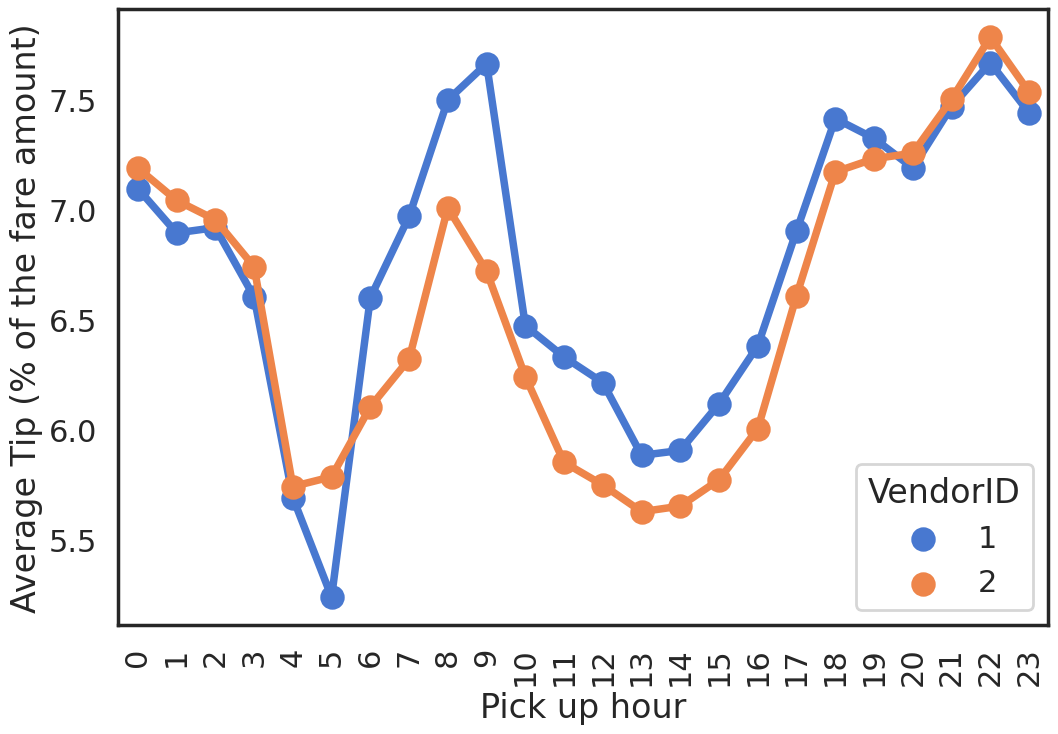

In [123]:
grouped_df = df_raw.groupby(['pickup_hour', 'VendorID'])['tip_percent'].mean().reset_index() #average tip
plt.figure(figsize=(12,8))
sns.pointplot(x='pickup_hour', y='tip_percent', hue='VendorID', data=grouped_df)
plt.ylabel('Average Tip (% of the fare amount)')
plt.xlabel('Pick up hour')
plt.xticks(rotation='vertical')
plt.show()


**Findings:**

According to the data, on average, Vendor 1 has a higher average tip percentage compared to Vendor 2. Furthermore, Vendor 1 tends to earn higher average tip percentages between 6am to 7pm, whereas Vendor 2 tends to receive more tips from 8pm to 5am. However, Vendor 2 holds the highest average tip percentage of 7.9 dollars at the pick-up hour of 10pm, whereas Vendor 1's highest average tip percentage is 7.8 dollars at the pick-up hour of 9am.

## **b) Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work.**

## **Predictive Model**

In [169]:
import xgboost as xgb # please install xgboost before running this script.
import lightgbm as lgb # please install lightgbm before running this script.

In [178]:
# load the data into a new pandas dataframe.
df_model = pq.read_table(file_path).to_pandas() # read data into a pandas dataframe


In [179]:
df_model = df_model.reset_index() # reset the index of our dataframe. 

In [180]:
#rename our columns.
df_model = df_model.rename(columns={'index': 'ID', 'lpep_pickup_datetime': 'pickup_datetime', 'lpep_dropoff_datetime': 'dropoff_datetime'})


In [181]:
df_model.drop(['ehail_fee', 'RatecodeID', 'extra', 'congestion_surcharge',], axis=1, inplace=True) #drop these features, because they're either all 0's or Nan's


In [182]:
display_data(df_model.tail()) # let's see how our data looks like.

,ID,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
882459,882459,2,2017-09-30 23:42:33,2017-09-30 23:45:24,N,41,42,1,0.88,5.00,0.5,0.00,0.0,0.3,6.30,2,1
882460,882460,2,2017-09-30 23:48:34,2017-09-30 23:55:25,N,42,152,1,0.98,6.50,0.5,0.00,0.0,0.3,7.80,2,1
882461,882461,2,2017-09-30 23:59:25,2017-10-01 00:12:47,N,166,142,1,2.95,13.00,0.5,2.86,0.0,0.3,17.16,1,1
882462,882462,2,2017-09-30 23:03:49,2017-09-30 23:20:03,N,196,129,1,2.62,12.50,0.5,0.20,0.0,0.3,14.00,1,1
882463,882463,2,2017-09-30 23:47:14,2017-09-30 23:47:19,N,132,132,1,0.00,55.76,0.0,11.15,0.0,0.0,66.91,1,2


In [183]:
df_model['tip_percent'] = df_model['tip_amount']/df_model['total_amount'] # calculate the tip percent
df_model['tip_percent'] = df_model['tip_percent'].apply(lambda x: x * 100) # multiply the value by 100
df_model = df_model[df_model['tip_amount'] > 0] # make sure the tip is greater than zero
df_model = df_model[df_model['fare_amount'] > 0] # make sure the fare amount is greater than zero

## **Feature Correlation Analysis:**

Let's identify correlation using a heatmap and check how the features are correlated

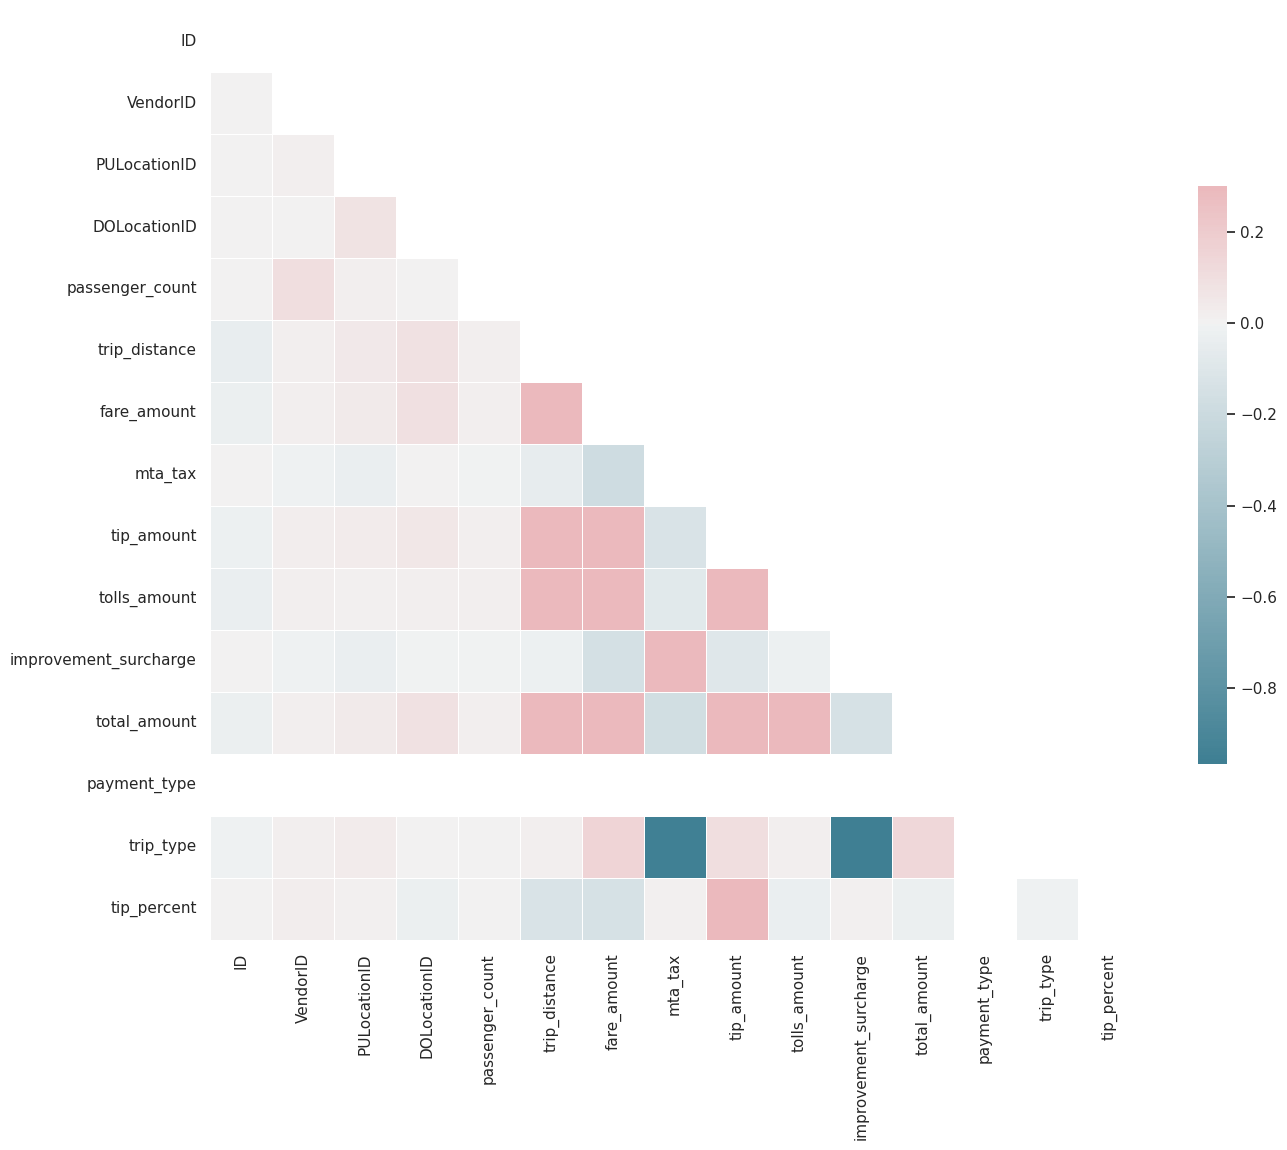

In [184]:
sns.set(style="white")

# Generate a large random dataset
temp3 = df_model.copy() # our dataframe

# Compute the correlation matrix
corr = temp3.corr() # corr calculation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


## **Findings:**

Variables such as total_amount, tolls_amount, and trip_type are of significant importance and demonstrate strong relationships with other variables.

Variables such as payment_type, trip_distance, and pickup_longitude are of relatively low importance and do not seem to have strong relationships with other variables.

On the other hand, total_amount is crucial, with a high correlation coefficient of 0.8.

Although strong correlations are observed among various independent variables (IDVs), we will be using a tree-based model, so there may not be a need to remove variables that are highly correlated. However, for the robustness of the model, it could be worth considering removing them. Additionally, tip_percent appears to be moderately correlated with several IDVs.

## **Train-test split**

In [185]:
y = df_model.tip_percent # tip_percent is our target variable
X = df_model # predictor varibles

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) # test size = 0.2, hence 80-20 split.
print ( "\nX_train:\n")
print (X_train.shape)
print ("\nX_test:\n")
print (X_test.shape)


X_train:

(288209, 18)

X_test:

(72053, 18)


In [187]:
X_train.head() # this is our training data

,ID,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,tip_percent
865817,865817,2,2017-09-30 16:58:26,2017-09-30 17:01:07,N,33,33,1,0.67,4.0,0.5,0.96,0.0,0.3,5.76,1,1,16.666667
98237,98237,2,2017-09-04 19:00:16,2017-09-04 19:18:47,N,96,129,1,3.81,15.5,0.5,4.89,0.0,0.3,21.19,1,1,23.076923
800423,800423,2,2017-09-28 17:08:09,2017-09-28 17:17:05,N,255,112,1,1.01,7.5,0.5,1.86,0.0,0.3,11.16,1,1,16.666667
179829,179829,2,2017-09-07 18:34:34,2017-09-07 18:37:09,N,65,66,1,0.58,4.0,0.5,1.45,0.0,0.3,7.25,1,1,20.000000
543113,543113,2,2017-09-19 18:45:42,2017-09-19 18:59:33,N,82,157,1,1.89,11.0,0.5,3.20,0.0,0.3,16.00,1,1,20.000000


In [188]:

X_test = X_test.iloc[:, :-1] # exclude the target variable(tip_percent) from our test data

In [189]:
X_test.shape # test data shape

(72053, 17)

In [190]:
X_test.head() # test data

,ID,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
570990,570990,2,2017-09-20 18:24:16,2017-09-20 18:33:15,N,74,166,1,0.98,7.5,0.5,1.86,0.00,0.3,11.16,1,1
824300,824300,2,2017-09-29 13:47:14,2017-09-29 14:08:54,N,75,138,2,8.13,25.5,0.5,6.41,5.76,0.3,38.47,1,1
658354,658354,2,2017-09-23 17:03:41,2017-09-23 17:23:05,N,75,143,1,2.67,14.0,0.5,2.96,0.00,0.3,17.76,1,1
354943,354943,1,2017-09-13 16:08:54,2017-09-13 16:12:46,N,75,74,2,0.90,5.0,0.5,0.70,0.00,0.3,7.50,1,1
211882,211882,2,2017-09-08 19:05:26,2017-09-08 19:26:44,N,75,233,1,3.36,16.0,0.5,2.00,0.00,0.3,19.80,1,1


In [191]:
X_test.drop(['tip_amount'], axis=1, inplace=True) 
# Drop the tip_amount, because then it'd be easy for the model to identify the percentage 
# of tip by just dividing it with the total fare.

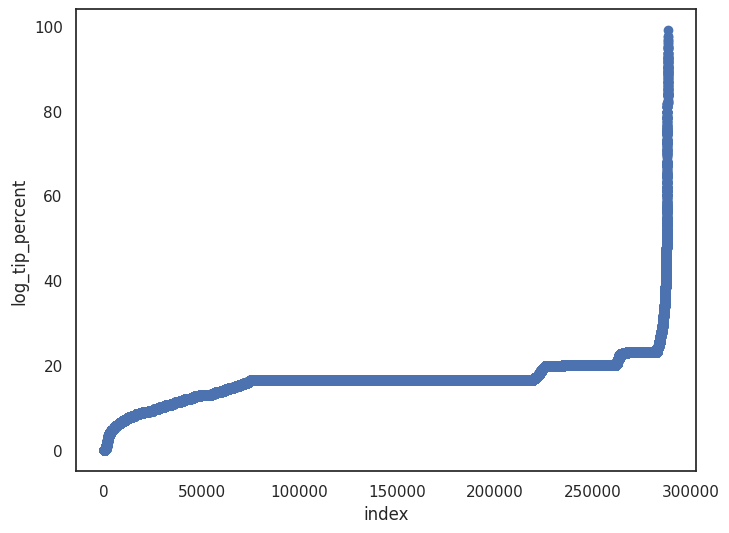

In [192]:
X_train['log_tip_percent'] = np.log1p(X_train['tip_percent'].values) # logarithm of the tip_percent, because we use RMSLE

plt.figure(figsize=(8,6))
plt.scatter(range(X_train.shape[0]), np.sort(X_train.tip_percent.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('log_tip_percent', fontsize=12)
plt.show()

## **Check to see if there are any null values in the data**

In [193]:
null_count_df = X_train.isnull().sum(axis=0).reset_index() # training set
null_count_df.columns = ['col_name', 'null_count']
null_count_df

,col_name,null_count
0,ID,0
1,VendorID,0
2,pickup_datetime,0
3,dropoff_datetime,0
4,store_and_fwd_flag,0
5,PULocationID,0
6,DOLocationID,0
7,passenger_count,0
8,trip_distance,0
9,fare_amount,0


In [194]:
null_count_df = X_test.isnull().sum(axis=0).reset_index() # test set
null_count_df.columns = ['col_name', 'null_count']
null_count_df

,col_name,null_count
0,ID,0
1,VendorID,0
2,pickup_datetime,0
3,dropoff_datetime,0
4,store_and_fwd_flag,0
5,PULocationID,0
6,DOLocationID,0
7,passenger_count,0
8,trip_distance,0
9,fare_amount,0


There are no missing values.

## **Validation Strategy:**


*   A well-defined validation strategy is crucial as it allows for effective model evaluation and comparison. Without proper validation, it can be challenging to accurately assess the performance of different models against each other.

*   Given that dates are included in the dataset, it is imperative to verify whether the train and test datasets are sourced from the same time period or distinct time periods. This ensures that the model is evaluated on relevant and comparable data.







### ***X TRAIN***

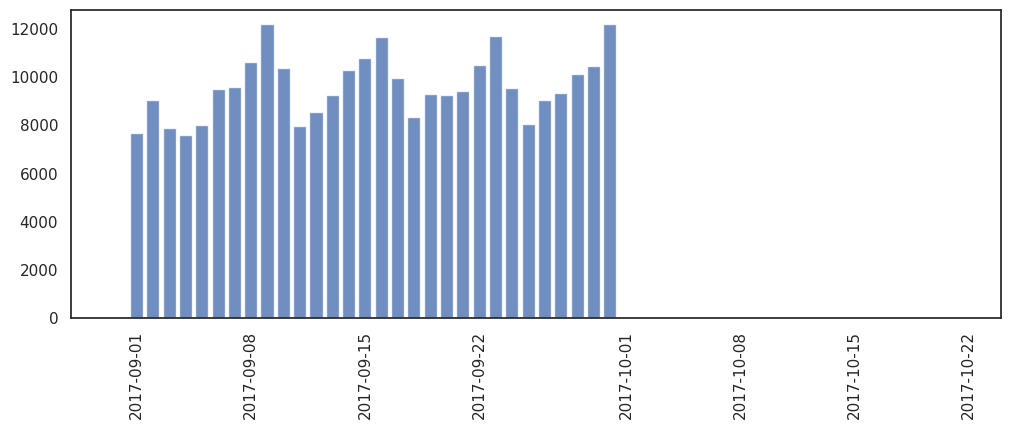

In [212]:
# Convert 'pickup_date' to datetime type
X_train['pickup_date'] = pd.to_datetime(X_train['pickup_date'])

# Filter pickup dates to include only dates from 2017
pickup_date_filtered = X_train[X_train['pickup_date'].dt.year == 2017]

# Get frequency counts of pickup dates in filtered DataFrame
cnt_srs = pickup_date_filtered['pickup_date'].value_counts()

# Create bar chart
plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

### ***X TEST***

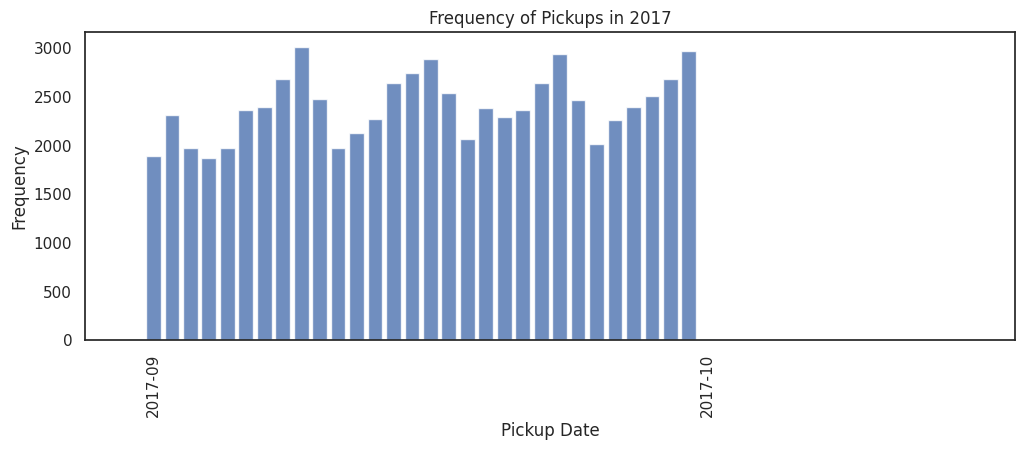

In [216]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'pickup_datetime' column to datetime type
X_test['pickup_datetime'] = pd.to_datetime(X_test['pickup_datetime'])

# Extract 'pickup_date' from 'pickup_datetime' column
X_test['pickup_date'] = X_test['pickup_datetime'].dt.date

# Filter pickup dates to include only dates from 2017
pickup_date_filtered2 = X_test[X_test['pickup_datetime'].dt.year == 2017]

# Get frequency counts of pickup dates in filtered DataFrame
cnt_srs = pickup_date_filtered2['pickup_date'].value_counts()

# Create bar chart
plt.figure(figsize=(12, 4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation='vertical')
plt.xlabel('Pickup Date')
plt.ylabel('Frequency')
plt.title('Frequency of Pickups in 2017')
plt.show()

## **Findings**

Given the close resemblance between the distributions, it appears feasible to employ K-fold cross-validation on our dataset. However, it's crucial to keep in mind that if the training and testing datasets are derived from disparate time periods, time-based validation would be necessary.






## **Baseline Model**



*   Once we have gained an understanding of the dataset, we can proceed to construct a baseline model employing the XGBoost algorithm, and assess its performance.

*   To enhance the dataset, we can derive some fundamental variables from the datetime column and transform the store_and_forward_flag into a numeric format.




In [218]:
# day of the month 
X_train['pickup_day'] = X_train['pickup_datetime'].dt.day
X_test['pickup_day'] = X_test['pickup_datetime'].dt.day

# month of the year 
X_train['pickup_month'] = X_train['pickup_datetime'].dt.month
X_test['pickup_month'] = X_test['pickup_datetime'].dt.month

# hour of the day 
X_train['pickup_hour'] = X_train['pickup_datetime'].dt.hour
X_test['pickup_hour'] = X_test['pickup_datetime'].dt.hour

# Week of year 
X_train["week_of_year"] = X_train["pickup_datetime"].dt.weekofyear
X_test["week_of_year"] = X_test["pickup_datetime"].dt.weekofyear

# Day of week 
X_train["day_of_week"] = X_train["pickup_datetime"].dt.weekday
X_test["day_of_week"] = X_test["pickup_datetime"].dt.weekday

# Convert to numeric 
map_dict = {'N':0, 'Y':1}
X_train['store_and_fwd_flag'] = X_train['store_and_fwd_flag'].map(map_dict)
X_test['store_and_fwd_flag'] = X_test['store_and_fwd_flag'].map(map_dict)

In [219]:
# drop off the variables which are not needed 
cols_to_drop = ['ID', 'pickup_datetime', 'pickup_date', 'dropoff_datetime']
train_id = X_train['ID'].values
test_id = X_test['ID'].values
train_y = X_train.log_tip_percent.values
train_X = X_train.drop(cols_to_drop + ['tip_amount', 'tip_percent', 'log_tip_percent'], axis=1)
test_X = X_test.drop(cols_to_drop, axis=1)

LightGBM distinguishes itself from other tree-based algorithms by adopting a vertical tree growth strategy, where trees are constructed leaf-wise rather than level-wise. This means that LightGBM selects the leaf with the maximum delta loss for growth, resulting in more effective reduction of loss during tree construction compared to level-wise algorithms. As a result, the leaf-wise approach of LightGBM can yield higher performance by reducing loss more efficiently during tree growth.

**Helper function to run the xgboost model and light gbm model**

In [220]:
def runXGB(train_X, train_y, val_X, val_y, test_X, eta=0.05, max_depth=5, min_child_weight=1, subsample=0.8, colsample=0.7, num_rounds=8000, early_stopping_rounds=100, seed_val=2017):
    params = {}
    params["objective"] = "reg:linear"
    params['eval_metric'] = "rmse"
    params["eta"] = eta
    params["min_child_weight"] = min_child_weight
    params["subsample"] = subsample
    params["colsample_bytree"] = colsample
    params["silent"] = 1
    params["max_depth"] = max_depth
    params["seed"] = seed_val
    params["nthread"] = -1

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    xgval = xgb.DMatrix(val_X, label = val_y)
    xgtest = xgb.DMatrix(test_X)
    watchlist = [ (xgtrain,'train'), (xgval, 'test') ]
    model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=20)

    pred_val = model.predict(xgval, ntree_limit=model.best_ntree_limit)
    pred_test = model.predict(xgtest, ntree_limit=model.best_ntree_limit)

    return pred_val, pred_test

def runLGB(train_X, train_y, val_X, val_y, test_X, eta=0.05, num_leaves=10, max_depth=5, min_child_weight=1, subsample=0.8, colsample=0.7, num_rounds=8000, early_stopping_rounds=100, seed_val=2017):
    params = {}
    params["objective"] = "regression"
    params['metric'] = "l2_root"
    params["learning_rate"] = eta
    params["min_child_weight"] = min_child_weight
    params["bagging_fraction"] = subsample
    params["bagging_seed"] = seed_val
    params["feature_fraction"] = colsample
    params["verbosity"] = 0
    params["max_depth"] = max_depth
    params["num_leaves"] = num_leaves
    params["nthread"] = -1

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label = val_y)
    model = lgb.train(params, lgtrain, num_rounds, valid_sets=lgval, early_stopping_rounds=early_stopping_rounds, verbose_eval=20)

    pred_val = model.predict(val_X, num_iteration=model.best_iteration)
    pred_test = model.predict(test_X, num_iteration=model.best_iteration)

    return pred_val, pred_test, model

In [221]:
from sklearn import model_selection, preprocessing, metrics # import a few other modules

In [225]:
# SKIP THIS -- NOT NECESSARY ON EVERY MACHINE -- ONLY FOR macOS---

! import os

! os.environ['KMP_DUPLICATE_LIB_OK']='True' # this is only to overcome the dependencies for the lightgbm installation.

# SKIP THIS -- NOT NECESSARY ON EVERY MACHINE -- ONLY FOR macOS--

/bin/bash: import: command not found
/bin/bash: os.environ[KMP_DUPLICATE_LIB_OK]=True: command not found


In [226]:
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=2017)
cv_scores = []
pred_test_full = 0
pred_val_full = np.zeros(X_train.shape[0])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.iloc[dev_index], train_X.iloc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val, pred_test, model = runLGB(dev_X, dev_y, val_X, val_y, test_X, num_rounds=1000, num_leaves=10, max_depth=8, eta=0.3)
    pred_val_full[val_index] = pred_val
    pred_test_full += pred_test
    cv_scores.append(np.sqrt(metrics.mean_squared_error(val_y, pred_val)))
print(cv_scores)
print("Mean RMSE score : ",np.mean(cv_scores))

pred_test_full = pred_test_full / 5.
pred_test_full = np.expm1(pred_test_full)
pred_val_full = np.expm1(pred_val_full)

# saving train predictions for ensemble #
train_pred_df = pd.DataFrame({'ID':train_id})
train_pred_df['tip_percent'] = pred_val_full
train_pred_df.to_csv("train_preds_lgb_baseline.csv", index=False)

# saving test predictions for ensemble #
test_pred_df = pd.DataFrame({'ID':test_id})
test_pred_df['tip_percent'] = pred_test_full
test_pred_df.to_csv("test_preds_lgb_baseline.csv", index=False)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.162676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 100 rounds
[20]	valid_0's rmse: 0.270832
[40]	valid_0's rmse: 0.232273
[60]	valid_0's rmse: 0.208615
[80]	valid_0's rmse: 0.191277
[100]	valid_0's rmse: 0.17995
[120]	valid_0's rmse: 0.172357
[140]	valid_0's rmse: 0.166506
[160]	valid_0's rmse: 0.158944
[180]	valid_0's rmse: 0.152952
[200]	valid_0's rmse: 0.148266
[220]	valid_0's rmse: 0.14484
[240]	valid_0's rmse: 0.142304
[260]	valid_0's rmse: 0.140017
[280]	valid_0's rmse: 0.137683
[300]	valid_0's rmse: 0.136396
[320]	valid_0's rmse: 0.134962
[340]	valid_0's rmse: 0.13379
[360]	valid_0's rmse: 0.132517
[380]	valid_0's rmse: 0.131446
[400]	valid_0's rmse: 0.130952
[420]	valid_0's rmse: 0.129485
[440]	valid_0's rmse: 0.128351
[460]	valid_0's rmse: 0.12702
[480

LightGBM model gave us a RMSE score of 0.117

RMSE, or Root Mean Square Error, is a measure used to evaluate the accuracy of a regression model. It quantifies the difference between the predicted values of the model and the observed data values. A lower RMSE indicates a better fit of the model to the data, meaning that the predicted values are closer to the observed data points.

A good RMSE score depends on the context and the specific application of the model. In general, lower RMSE values indicate better prediction accuracy. A RMSE score of 0.117 is good. 

## **Plot the most feature importance chart to identify the features which were really useful in our prediction step**

Plot feature importances...


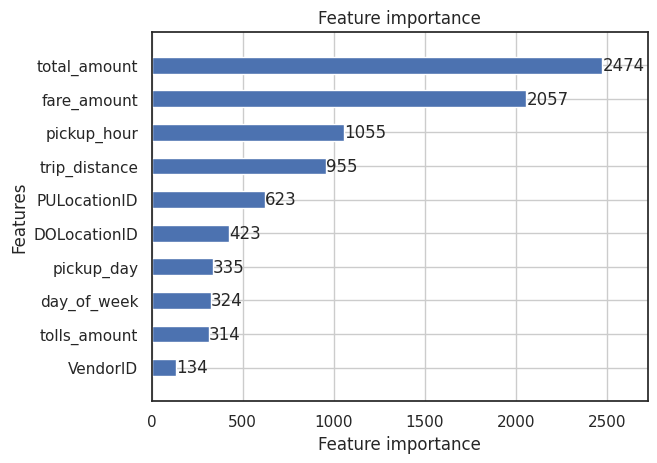

In [227]:
print('Plot feature importances...')
ax = lgb.plot_importance(model, max_num_features=10, height = 0.5)
plt.show()

# Question 5

## **Option A: Distributions**

In [228]:
df_raw.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,pickup,pickup_hour,dropoff,dropoff_hour,day_of_week,Airport,tip_percent
0,2,2017-09-01 00:56:15,2017-09-01 00:56:18,N,1,193,193,1,0.00,2.5,...,2,1,None,2017-09-01 00:56:15,0,2017-09-01 00:56:18,0,4,NOT,0.000000
1,2,2017-09-01 00:40:55,2017-09-01 00:49:22,N,1,80,17,1,1.74,8.0,...,1,1,None,2017-09-01 00:40:55,0,2017-09-01 00:49:22,0,4,NOT,23.076923
2,2,2017-09-01 00:17:11,2017-09-01 00:20:40,N,1,256,255,1,0.93,5.0,...,2,1,None,2017-09-01 00:17:11,0,2017-09-01 00:20:40,0,4,NOT,0.000000
3,2,2017-09-01 00:46:31,2017-09-01 01:04:31,N,1,145,61,1,5.85,19.0,...,1,1,None,2017-09-01 00:46:31,0,2017-09-01 01:04:31,1,4,NOT,20.015760
4,2,2017-09-01 00:02:04,2017-09-01 00:07:03,N,1,37,225,1,1.15,5.5,...,2,1,None,2017-09-01 00:02:04,0,2017-09-01 00:07:03,0,4,NOT,0.000000


In [229]:
ans_t = (df_raw['dropoff'] - df_raw['pickup']).apply(lambda x: x.total_seconds()) # extract the seconds from pickup data


In [230]:
print('Percentage of entries with travel time less than a minute: ',100 * df[ans_t < 60].shape[0]/df.shape[0],'%')


Percentage of entries with travel time less than a minute:  3.225806451612903 %


Trips with durations of less than 60 seconds are unlikely to be accurate, so we exclude these entries from our analysis to avoid potential bias. There are approximately 4000 such entries, which account for about 3.23% of the entire dataset. After removing this portion of data, we can proceed with our analysis

## **a) Build a derived variable representing the average speed over the course of a trip.**

In [232]:
df_raw['travel_time'] = (df_raw['dropoff'] - df_raw['pickup']).apply(lambda x: x.total_seconds()) 
df_raw = df_raw[df_raw['travel_time'] > 60] # travel time greater than 60 seconds
df_raw['average_speed'] = 3600*(df_raw['trip_distance']/df_raw['travel_time'])

<Axes: ylabel='Frequency'>

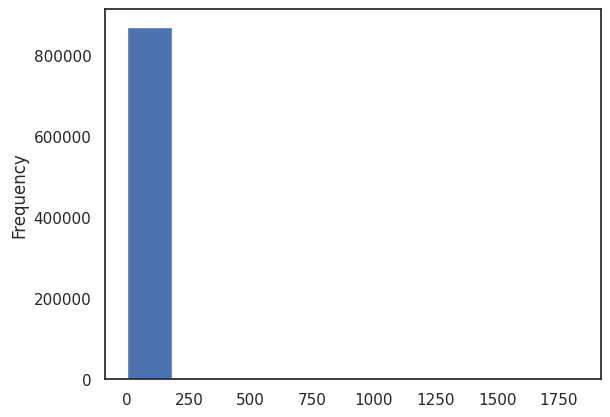

In [233]:
df_raw['average_speed'].plot.hist(bins=10)

In [235]:
print('No of entries with average speed over 100 miles per hour: ',(df_raw['average_speed']>100).value_counts()[1])
df_raw = df_raw[df_raw['average_speed']<100]

No of entries with average speed over 100 miles per hour:  75


We filter away the 75 entries with over 100 miles per hour of average speed as it is unreasonable and must have been a result of some erroneous data collection process or later in the pipeline.


## **b) Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?**

In [236]:
df_raw['week'] = df_raw['dropoff'].apply(lambda x: x.week) # extract week of year

In [237]:
df_raw['week'].value_counts() # week count

37    205508
36    203782
38    202097
39    177995
35     80030
40        44
42        16
41        12
1          3
44         3
48         3
43         2
46         2
45         2
Name: week, dtype: int64

In [239]:
week_1 = df_raw['average_speed'][df_raw['week']==36].values # reassign week=36 to week_1 df
week_2 = df_raw['average_speed'][df_raw['week']==37].values # reassign week=37 to week_2 df
week_3 = df_raw['average_speed'][df_raw['week']==38].values # reassign week=38 to week_3 df
week_4 = df_raw['average_speed'][df_raw['week']==39].values # reassign week=39 to week_4 df
week_5 = df_raw['average_speed'][df_raw['week']==40].values # reassign week=40 to week_5 df


In [240]:
stats.f_oneway(week_1,week_2, week_3,week_4, week_5)

F_onewayResult(statistic=549.0952242559998, pvalue=0.0)

### **Hypotheses test**

Based on the ANOVA test results, we observed a significant F-value and a small p-value. Therefore, we reject the null hypothesis, and it can be concluded that there are statistically significant differences between the groups. This suggests that the week of the month is indeed related to the average speed. To further substantiate our findings, we also calculated the mean, median, and histogram for each group

In [241]:
print(week_1.mean(),week_2.mean(),week_3.mean(),week_4.mean(),week_5.mean())

12.443903516475336 11.892298231546622 12.275733207598712 11.717498646620344 9.003015154088944


In [242]:
print(statistics.median(week_1),statistics.median(week_2),statistics.median(week_3),statistics.median(week_4),
      statistics.median(week_5))

11.294727744165947 10.895486355389343 11.224334600760455 10.715008431703204 10.01841417368574


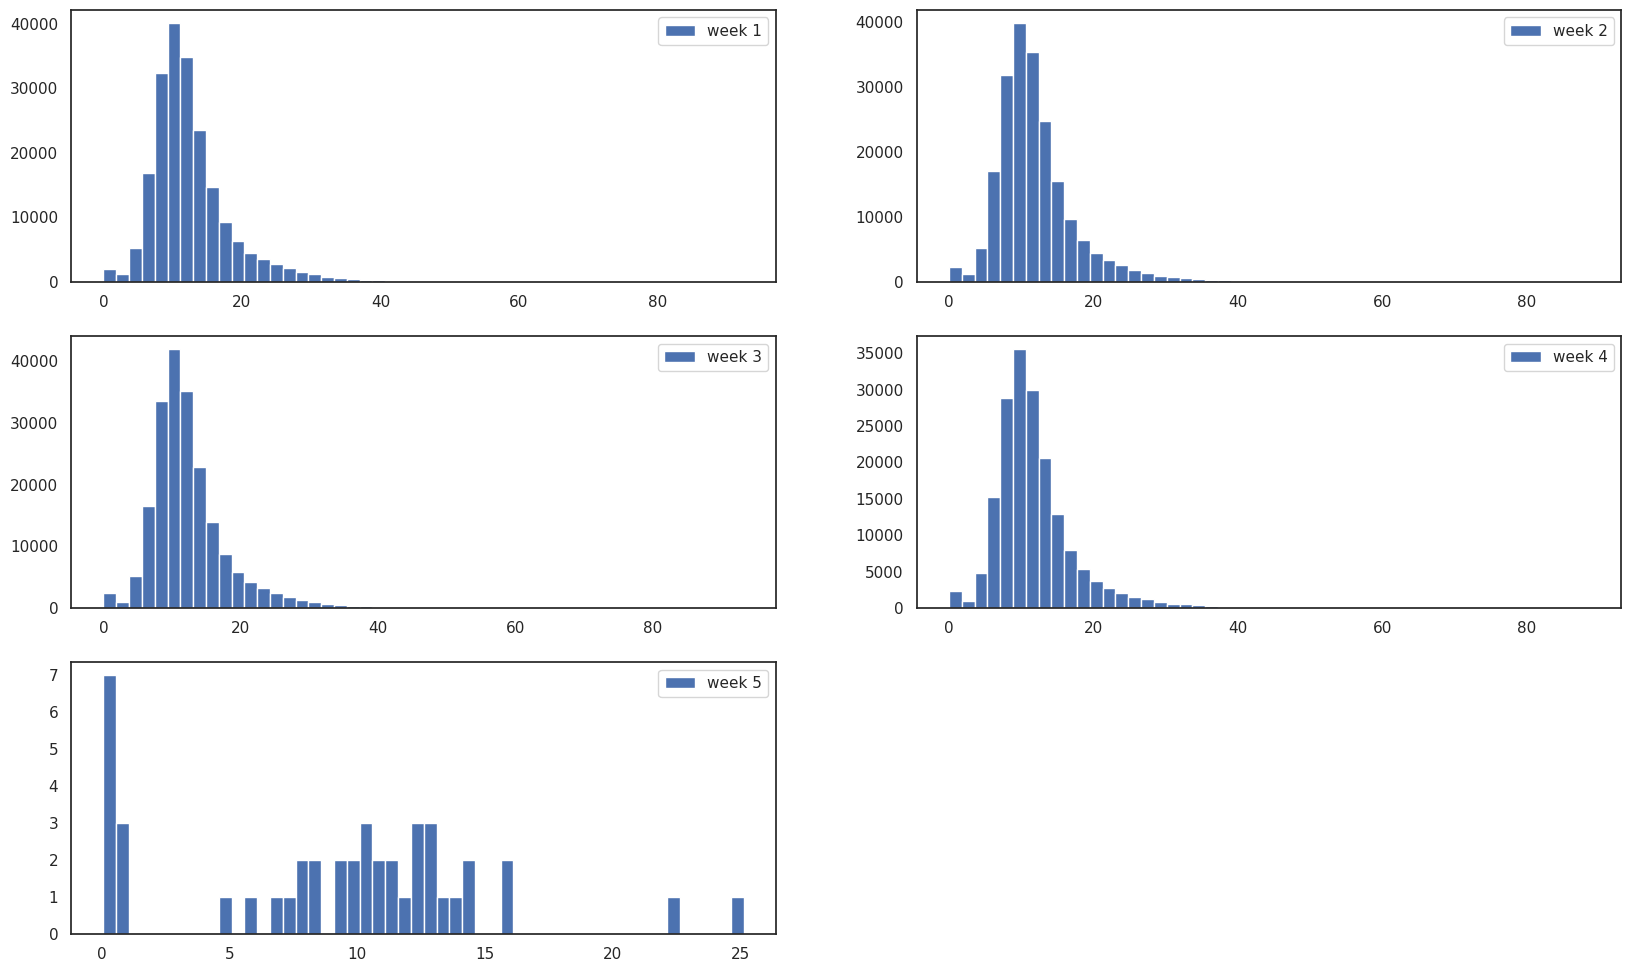

In [243]:
plt.rcParams["figure.figsize"] = [20,12]
plt.subplot(3,2,1)
plt.hist(week_1,bins = 50,label = 'week 1')
plt.legend()
plt.subplot(3,2,2)
plt.hist(week_2,bins = 50,label = 'week 2')
plt.legend()
plt.subplot(3,2,3)
plt.hist(week_3,bins = 50,label = 'week 3')
plt.legend()
plt.subplot(3,2,4)
plt.hist(week_4,bins = 50,label = 'week 4')
plt.legend()
plt.subplot(3,2,5)
plt.hist(week_5,bins = 50,label = 'week 5')
plt.legend()
plt.legend()
plt.savefig('task5')
plt.show()

In [244]:
grouped = df_raw.groupby('pickup_hour') # group by the hour
samples = []

for name,group in grouped:
    samples.append(group['average_speed']) # append the avg speed data

In [246]:

sample = samples
stats.f_oneway(sample[0],sample[1],sample[2],sample[3], sample[4],sample[5],sample[6],sample[7],sample[8],sample[9],
              sample[10],sample[11],sample[12],sample[13],sample[14],sample[15],sample[16],sample[17],sample[18],
               sample[19],
              sample[20],sample[21],sample[22],sample[23])

F_onewayResult(statistic=3962.603957847265, pvalue=0.0)

### **Hpotheses test**

The ANOVA test conducted on the sets partitioned by the hour of the journey also yielded a high F-value and a p-value of 0, indicating that there are statistically significant differences among the data sets being considered.

In [247]:
means = [] # empty list for storing the mean info
medians = [] # empty list for storing the median info
for hour in range(24):
    means.append(statistics.mean(sample[hour]))
    print('Mean:',statistics.mean(sample[hour]))
    medians.append(statistics.median(sample[hour]))
    print('Median:',statistics.median(sample[hour]))

Mean: 14.659922614540353
Median: 13.257790368271955
Mean: 14.757639988707787
Median: 13.479195606180411
Mean: 15.06900692147735
Median: 13.846153846153845
Mean: 15.559455869532826
Median: 14.234588318085855
Mean: 16.153038806910125
Median: 14.462680459247471
Mean: 17.836077469911125
Median: 15.964056179159735
Mean: 16.31687440405793
Median: 14.623424369747898
Mean: 12.598420232776437
Median: 11.208791208791208
Mean: 11.49087285524742
Median: 10.344827586206897
Mean: 11.895365828770883
Median: 10.746268656716419
Mean: 12.068143090047396
Median: 10.885900216919739
Mean: 11.876901640564517
Median: 10.721003134796238
Mean: 11.602464380717336
Median: 10.552763819095476
Mean: 11.50004697715361
Median: 10.438883464794893
Mean: 10.814330508674816
Median: 9.915632754342433
Mean: 10.267961623781401
Median: 9.543741905098317
Mean: 10.189049423514998
Median: 9.527272727272727
Mean: 10.279147988379538
Median: 9.6
Mean: 10.884686308834548
Median: 10.169491525423728
Mean: 11.415055838472076
Median: 1

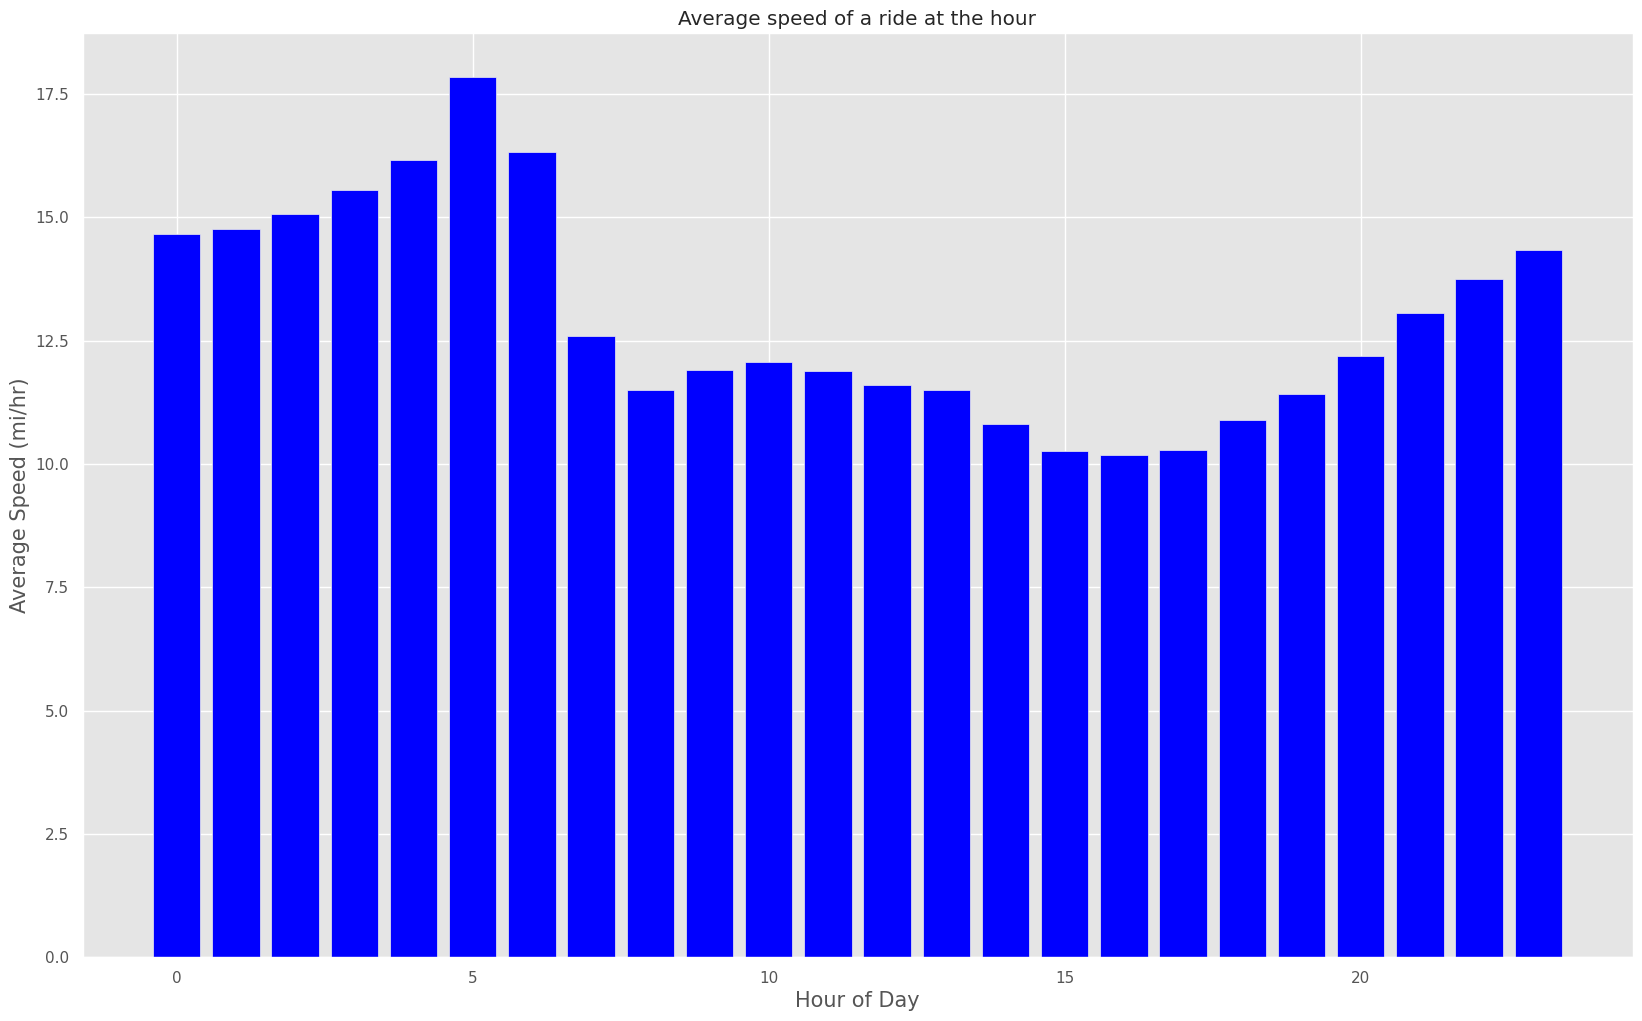

In [251]:
# Define values for the x-axis (hour of day)
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

plt.style.use('ggplot')

plt.bar(index, means, color='blue')
plt.xlabel("Hour of Day", fontsize = 15)
plt.ylabel("Average Speed (mi/hr)", fontsize = 15)
plt.title("Average speed of a ride at the hour")

plt.show()

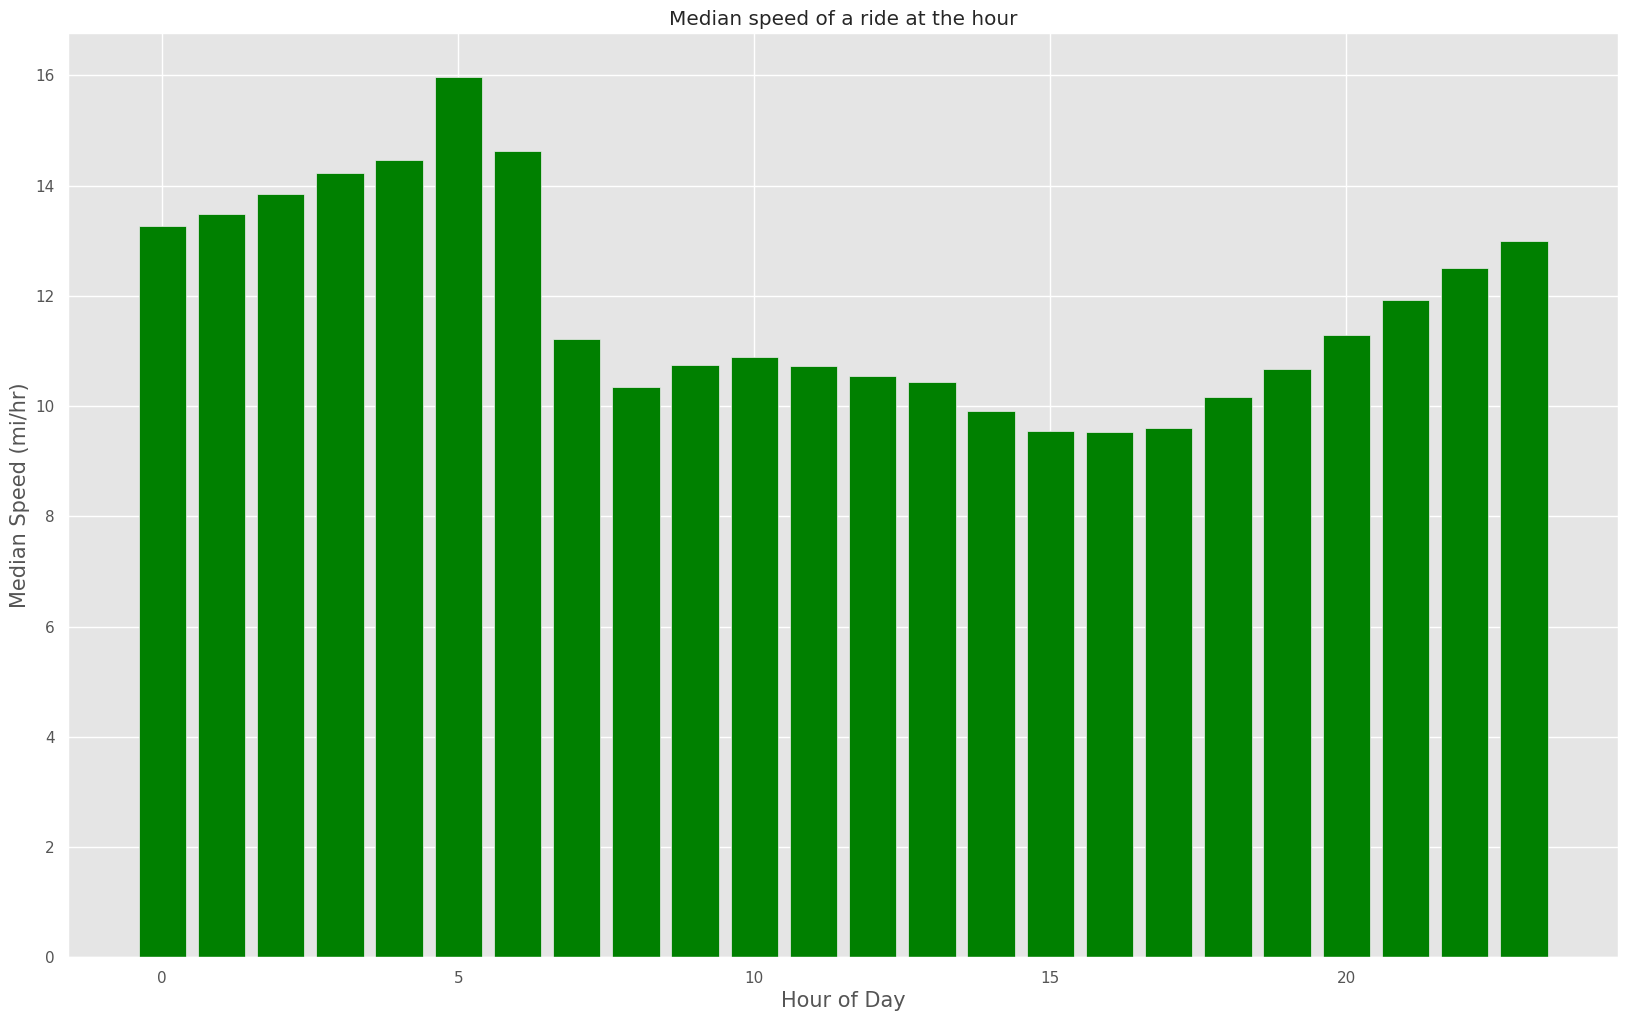

In [252]:
# Define values for the x-axis (hour of day)
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

plt.style.use('ggplot')

plt.bar(index, medians, color='green')
plt.xlabel("Hour of Day", fontsize = 15)
plt.ylabel("Median Speed (mi/hr)", fontsize = 15)
plt.title("Median speed of a ride at the hour")

plt.show()

### **Findings**

Based on the findings, it appears that the average speed is higher in the early morning hours, specifically between 4-6 AM, possibly due to minimal traffic on the road.